In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Генерим датасет
from sklearn.datasets import make_circles

dataset = make_circles(n_samples=1000, noise=0.1, factor=0.4, random_state=0)

dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))), columns=['x1', "x2", "y"])
dataset.head()

,x1,x2,y
0,0.441882,0.020749,1.0
1,0.004388,-0.252644,1.0
2,-0.786777,-0.757186,0.0
3,0.161325,0.254744,1.0
4,-0.275482,0.316769,1.0


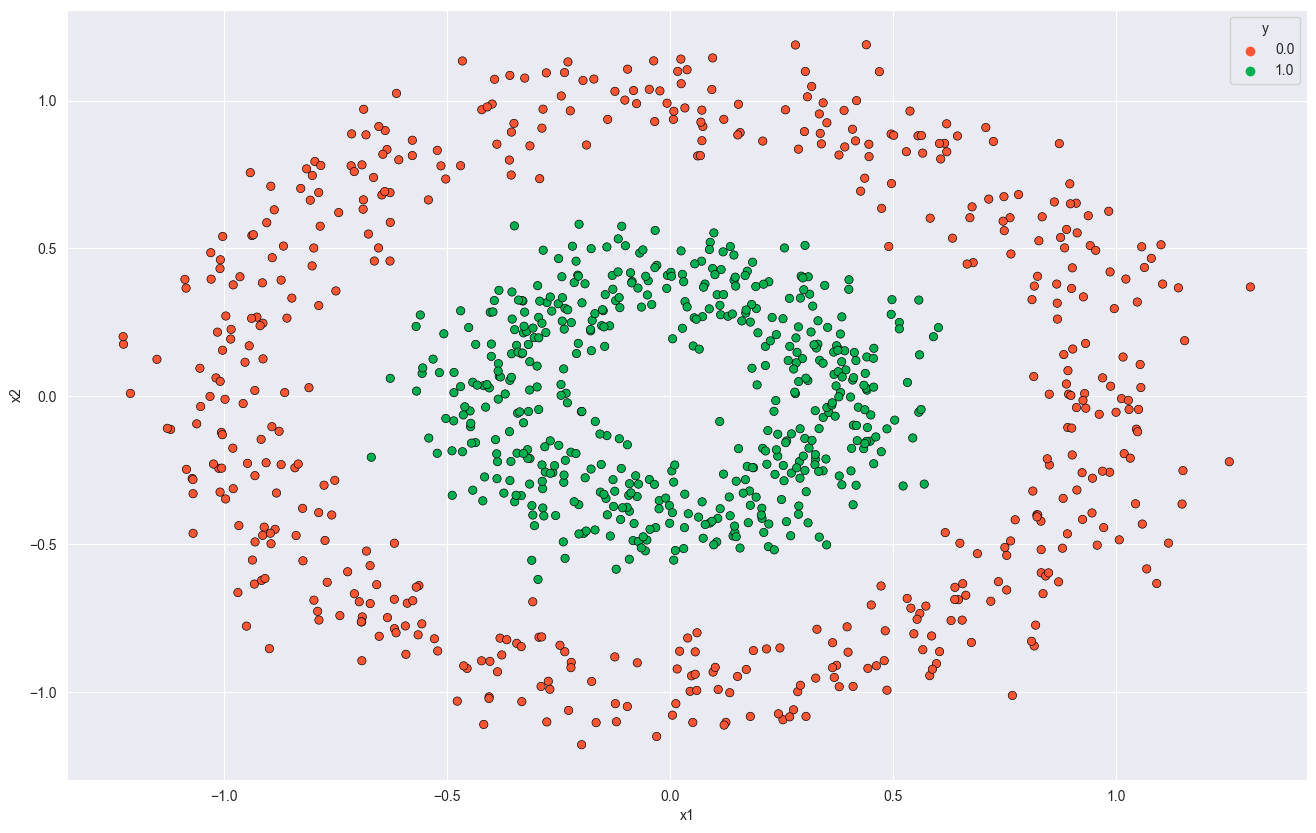

In [3]:
fig = plt.figure()
fig.set_size_inches(16, 10)
sns.scatterplot(x="x1", y="x2", hue="y", edgecolor="k", palette=["#FF5533", "#00B050"], data=dataset)
plt.show()

E:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
E:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
E:\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)
E:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
E:\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)
E:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warning

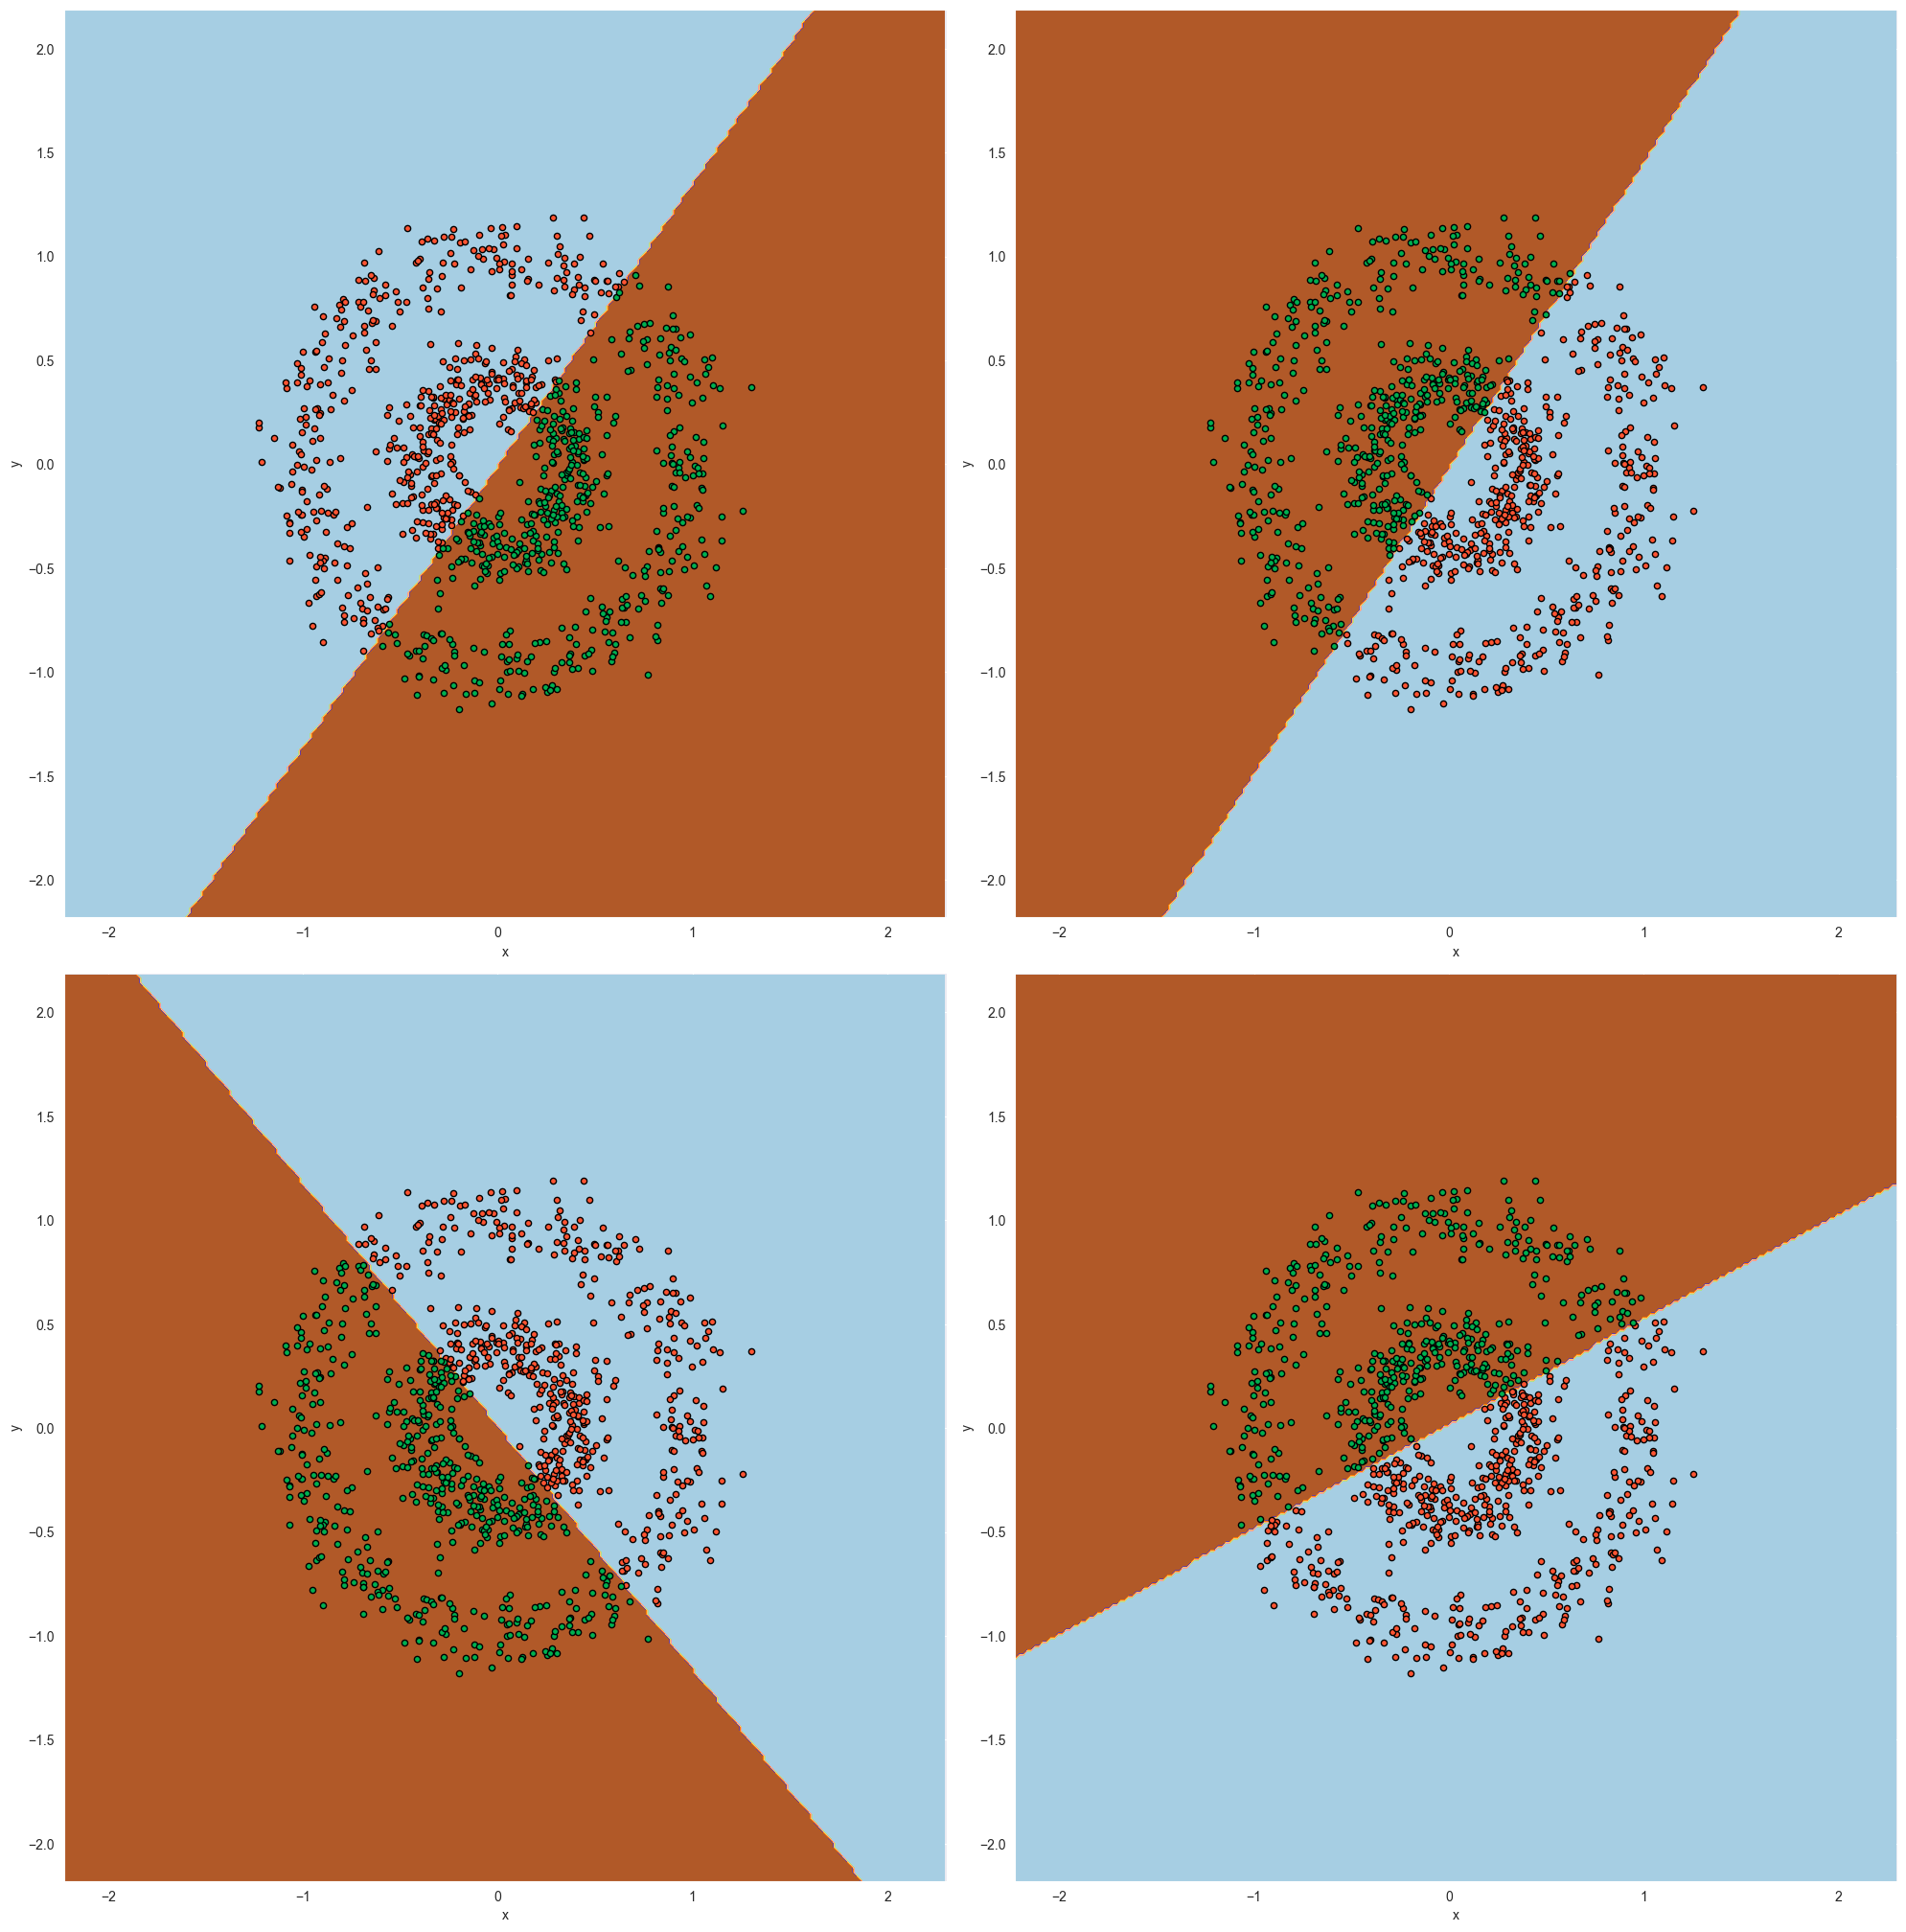

In [4]:
### Применим к объектам K-means
### с 2 кластерами и разными точками инициализации!

inits = ['random',
         'k-means++',
         np.array([[1, 1],
          [0, 0]]),
         np.array([[1, -2],
          [1, -2]])
        ]

from sklearn.cluster import KMeans

fig = plt.figure()
fig.set_size_inches(20, 50)

for i, s in enumerate(inits):

    X = dataset[["x1", "x2"]]

    kmeans = KMeans(n_clusters=2, init=s, random_state=0).fit(X)
    ax_ = fig.add_subplot(5, 2, i+1)

    pixel_step = 0.02
    x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
    x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

    ### Генерим много-много точек на плоскости

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, pixel_step),
        np.arange(x2_min, x2_max, pixel_step)
    )

    ### Для каждой точки даем прогноз, чтобы покрыть поверхности

    Z = kmeans.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    ### Заполняем пространство

    cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

    plt.axis("tight")

    ### Рисуем точечки и обученные области

    y = kmeans.predict(X)

    for i, c in zip(range(2), ["#FF5533", "#00B050"]):
        idx = np.where(y == i)
        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c=c,
            s=20,
            edgecolor="k",
        )
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel("x")
    plt.ylabel("y")

fig.tight_layout()
plt.show()

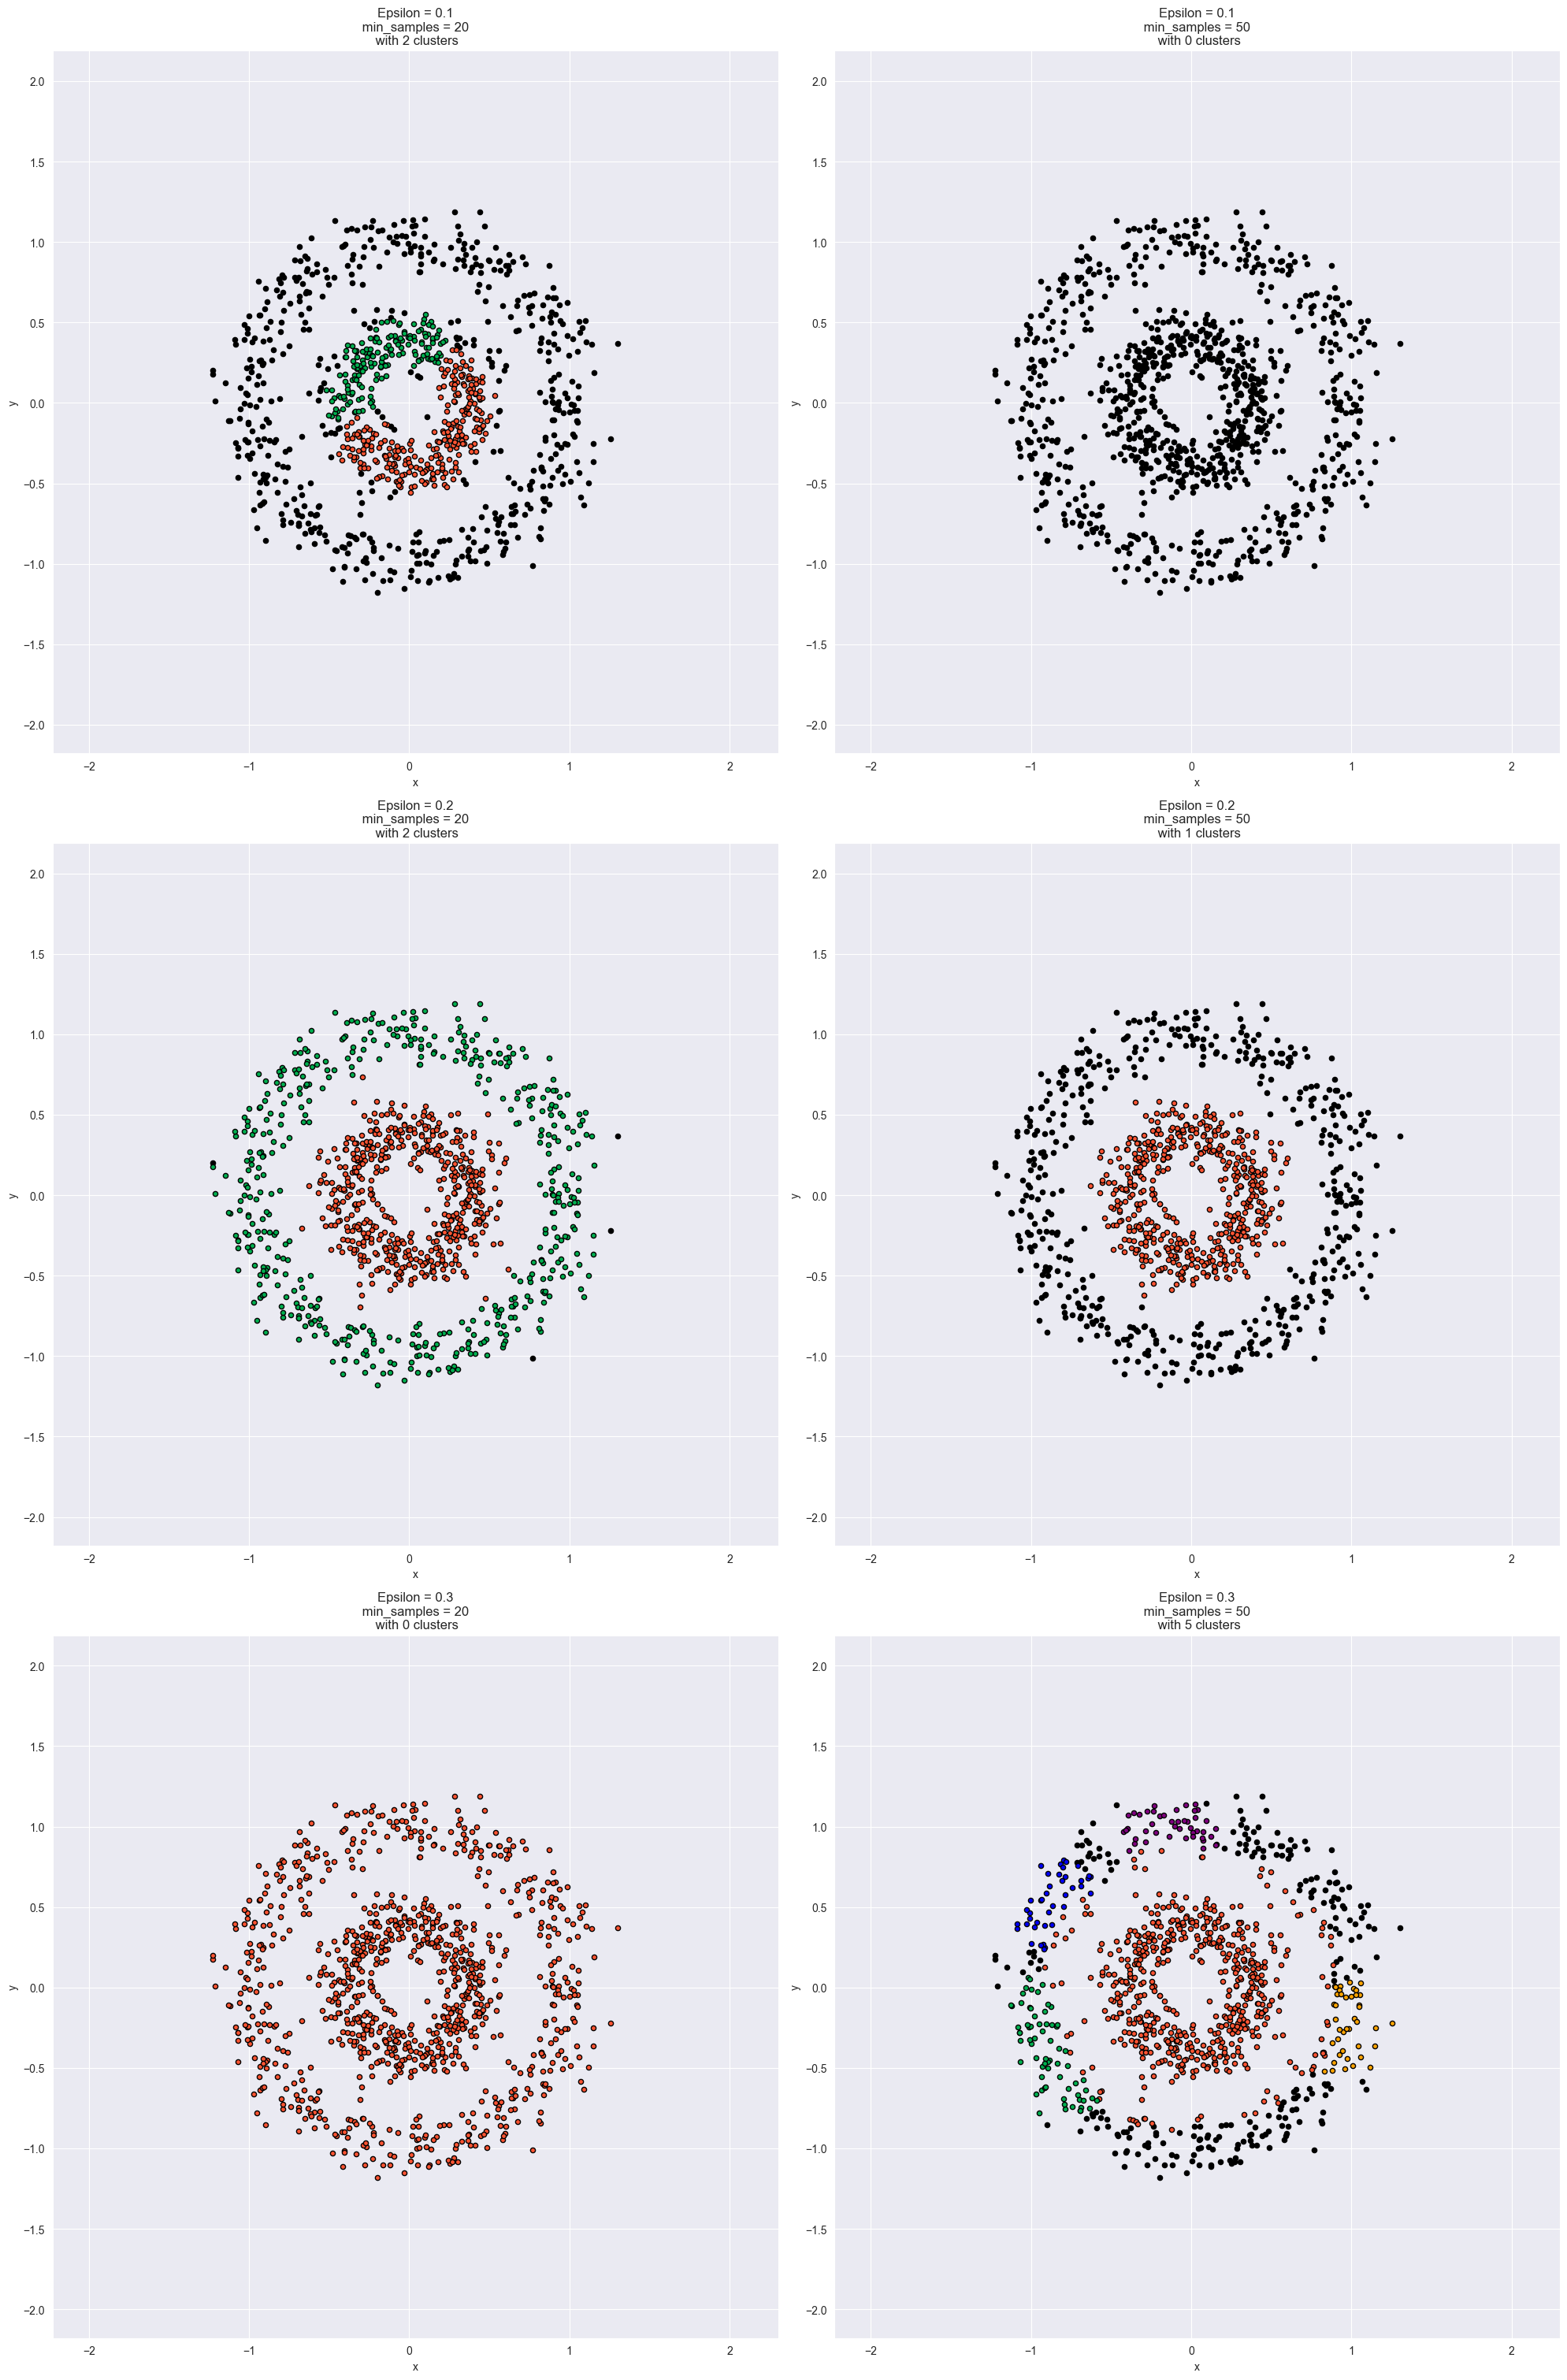

In [5]:
### Применим к объектам DBSDCAN
### с разными наборами пар гиперпараметров
### отвечающих за количество соседей у ядровых точек
### и за размер окрестности для проверки

pairs_of_hyperparams = [
                            [0.1,20],
                            [0.1,50],
                            [0.2,20],
                            [0.2,50],
                            [0.3,20],
                            [0.3,50],
                       ]

from sklearn.cluster import DBSCAN

fig = plt.figure()
fig.set_size_inches(20, 50)

for i, s in enumerate(pairs_of_hyperparams):

    X = dataset[["x1", "x2"]]

    dbscan = DBSCAN(eps=s[0], min_samples=s[1]).fit(X)
    ax_ = fig.add_subplot(5, 2, i+1)

    colors = ["black", "#FF5533",
              "#00B050", "orange",
              "blue", "purple"]

    y = dbscan.labels_
    labels = sorted(list(set(dbscan.labels_)))

    if len(labels)==1 and y[0]==0:
        colors = {0:"#FF5533"}
    else:
        colors = dict(zip(labels, colors))


    for i, c in zip(labels, colors.values()):

        idx = np.where(y == i)

        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c=c,
            s=20,
            edgecolor="k",
        )
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel("x")
    plt.ylabel("y")

    if len(y)==1 and y[0]==0:
        n_clusters = 1
    else:
        n_clusters = len(set(y))-1

    plt.title(f"Epsilon = {s[0]}\n min_samples = {s[1]} \n with {n_clusters} clusters")

fig.tight_layout()
plt.show()

In [6]:
df = pd.read_excel('processed_segmentation.xlsx')


df.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,22,1.000000,4.0,D,1,0,0,0.075826,0.109610,0.734985,0,1,0.213039,0.100092,0.381084
1,38,2.641663,3.0,A,0,1,1,0.270386,0.107296,0.251788,0,0,0.213039,0.100092,0.381084
2,67,1.000000,1.0,B,0,1,1,0.270386,0.107296,0.251788,0,1,0.234287,0.285472,0.248400
3,67,0.000000,2.0,B,1,1,1,0.253612,0.224719,0.205457,1,0,0.234287,0.285472,0.248400
4,40,2.641663,6.0,A,0,1,1,0.232877,0.155954,0.226554,1,0,0.234287,0.285472,0.248400


In [7]:
### Здесь данные центрировать необходимости нет

X = df.drop('Segmentation', axis=1)
Y = df['Segmentation']

In [9]:
### Произведем T-SNE преобразование

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X)

X_tsne

E:\ML\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\ML\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-84.40703   , -24.228645  ],
       [-15.634283  , -41.049717  ],
       [  2.0195973 ,  63.966343  ],
       ...,
       [ -1.434647  ,  -4.010711  ],
       [-16.358137  ,  39.48621   ],
       [ -0.60662085, -41.208218  ]], dtype=float32)

In [10]:
### Преобразуем в pd.DataFrame

X_tsne = np.concatenate((X_tsne, Y.values.reshape(-1, 1)),
                               axis=1)

X_tsne = pd.DataFrame(X_tsne, columns=['Tsne_1st_component',
                                       'Tsne_2nd_component',
                                       'SEGMENT'])

<AxesSubplot: xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

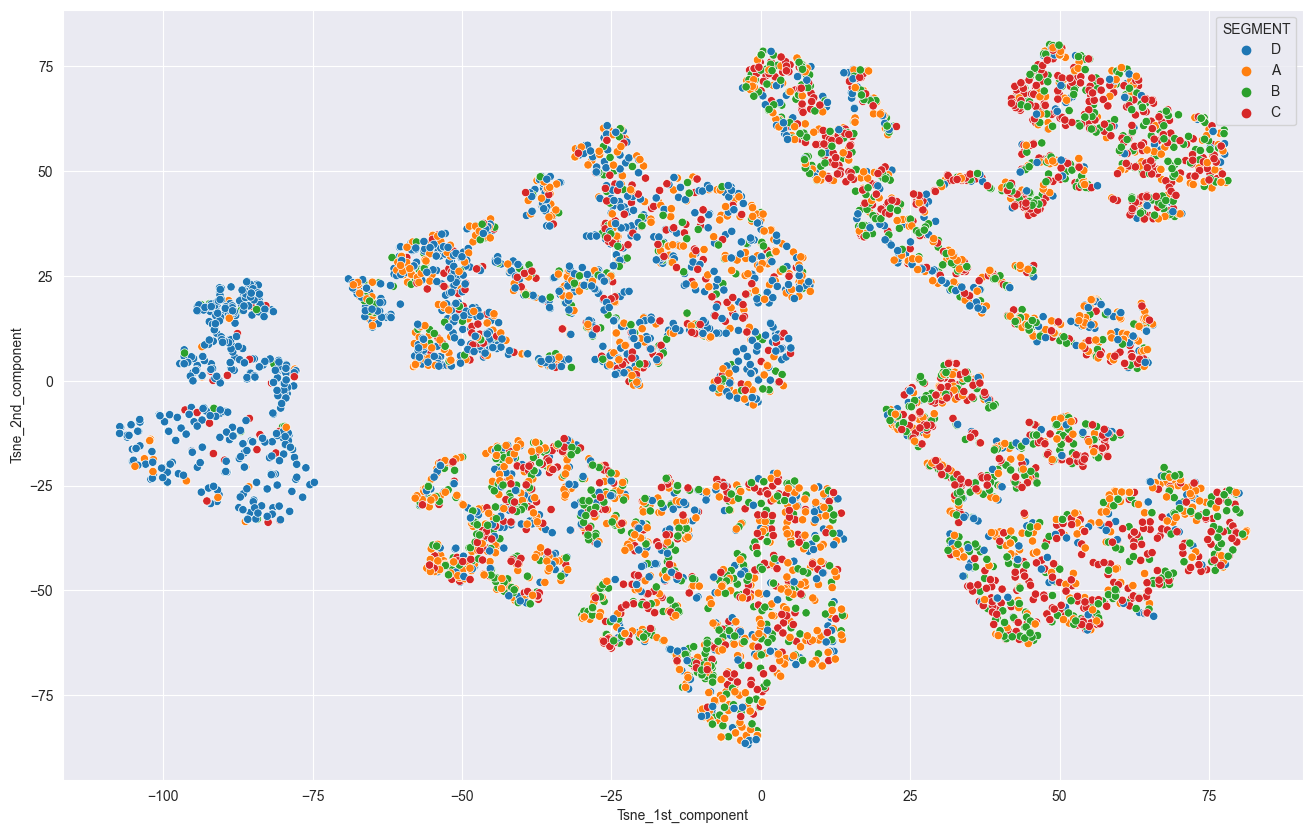

In [11]:
fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=X_tsne, x="Tsne_1st_component",
                y="Tsne_2nd_component",
                hue="SEGMENT")

In [12]:
### Просегментируем клиентов, используя K-Means с 4 кластерами:

kmeans_semg = KMeans(n_clusters=4).fit(X_scaled)
k_means_labels = kmeans_semg.predict(X_scaled)

X_tsne_with_kmeans_preds = pd.concat(
    (
        X_tsne, pd.DataFrame({"KMEANS label":k_means_labels})
    ),
    axis=1
)

X_tsne_with_kmeans_preds.head()

NameError: name 'X_scaled' is not defined

In [ ]:
import itertools

accuracies = {}

for perm in itertools.permutations(X_tsne['SEGMENT'].unique()):

    vv = dict(zip(perm, [0, 1, 2, 3]))

    mapping = X_tsne_with_kmeans_preds['SEGMENT'].map(vv)
    acc = (mapping == X_tsne_with_kmeans_preds['KMEANS label']).mean()

    accuracies[perm] = acc

print(f"{max(accuracies.values())} for {max(accuracies, key=accuracies.get)} combination")

In [ ]:
real_cluster_names = dict(zip([0, 1, 2, 3], max(accuracies, key=accuracies.get)))
real_cluster_names

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 10)

X_inv = X_tsne_with_kmeans_preds.copy()
X_inv["KMEANS label"] = X_inv["KMEANS label"].map(real_cluster_names)

sns.scatterplot(data=X_inv,
                x="Tsne_1st_component",
                y="Tsne_2nd_component",
                hue="KMEANS label",
                palette="deep")

plt.show()